Avaliando a generalização de algoritmos
===================
## Dados do Curso
**Instituição:** IFES

**Curso:** Mestrado Profissional Computação Aplicada

**Professor:** Francisco de Assis Boldt

**Aluno:** Arthur Chisté Lucas

## Ambiente
**IDE:** MS Visual Studio Code

**Versão Python:** 3.8.3 64bits com anaconda 2020.07

## Introdução

Nesta tarefa, será utilizado um dataset contendo a classificação de celulares obtido na Kaggle

https://www.kaggle.com/iabhishekofficial/mobile-price-classification

O dataset foi baixado e armazenado em meu GitHub público, sendo acessado diretamente de lá, conforme a URL abaixo:

https://github.com/arthurclucas/ReconhecimentoPadroes/blob/main/data/mobile_price_classification/train.csv?raw=true

Nesta tarefa, faremos a transformação de dados por meio dos scalers StandardScaler, RobustScaler e MinMaxScaler dentro e fora do pipeline e o cross validation dos dados com os cross validators TimeSeriesSplit, KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (cross_validate, TimeSeriesSplit, KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit)
from sklearn.preprocessing import (StandardScaler, RobustScaler, MinMaxScaler)
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [48]:
url = 'https://github.com/arthurclucas/ReconhecimentoPadroes/blob/main/data/mobile_price_classification/train.csv?raw=true'
dados = pd.read_csv(url)
dados.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Segue histograma de como os dados se encontram na base

In [50]:
# fig = plt.figure(figsize = (20,20))
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# ax = fig.gca()
# dados.hist(ax = ax)

Declara as instâncias dos Scalers, Cross Validator e modelos de classificação que serão utilizados.

A variável **Xs** terá uma lista de tuplas no formado (descrição, dados) gerados após tratamento pelos Scalers

In [51]:
n_splits=5

cvs = [KFold(n_splits=n_splits), ShuffleSplit(n_splits=n_splits), StratifiedKFold(n_splits=n_splits), StratifiedShuffleSplit(n_splits=n_splits), TimeSeriesSplit(n_splits=n_splits)]
scs = [StandardScaler(), RobustScaler(), MinMaxScaler()]
modelos = [LogisticRegression(), KNeighborsClassifier(n_neighbors=7)]
Xs = []

final = []
final_cols = ['modelo', 'cross_validator', 'scaler', 'mean', 'pipeline']

y = dados['price_range']
X = dados.drop('price_range', axis = 1)

In [52]:
Xs.clear()
Xs.append(('NoScaler', X))

for sc in scs:    
    Xs.append((type(sc).__name__, sc.fit_transform(X)))

Imprime os histogramas dos dados tratados por cada um dos scalers

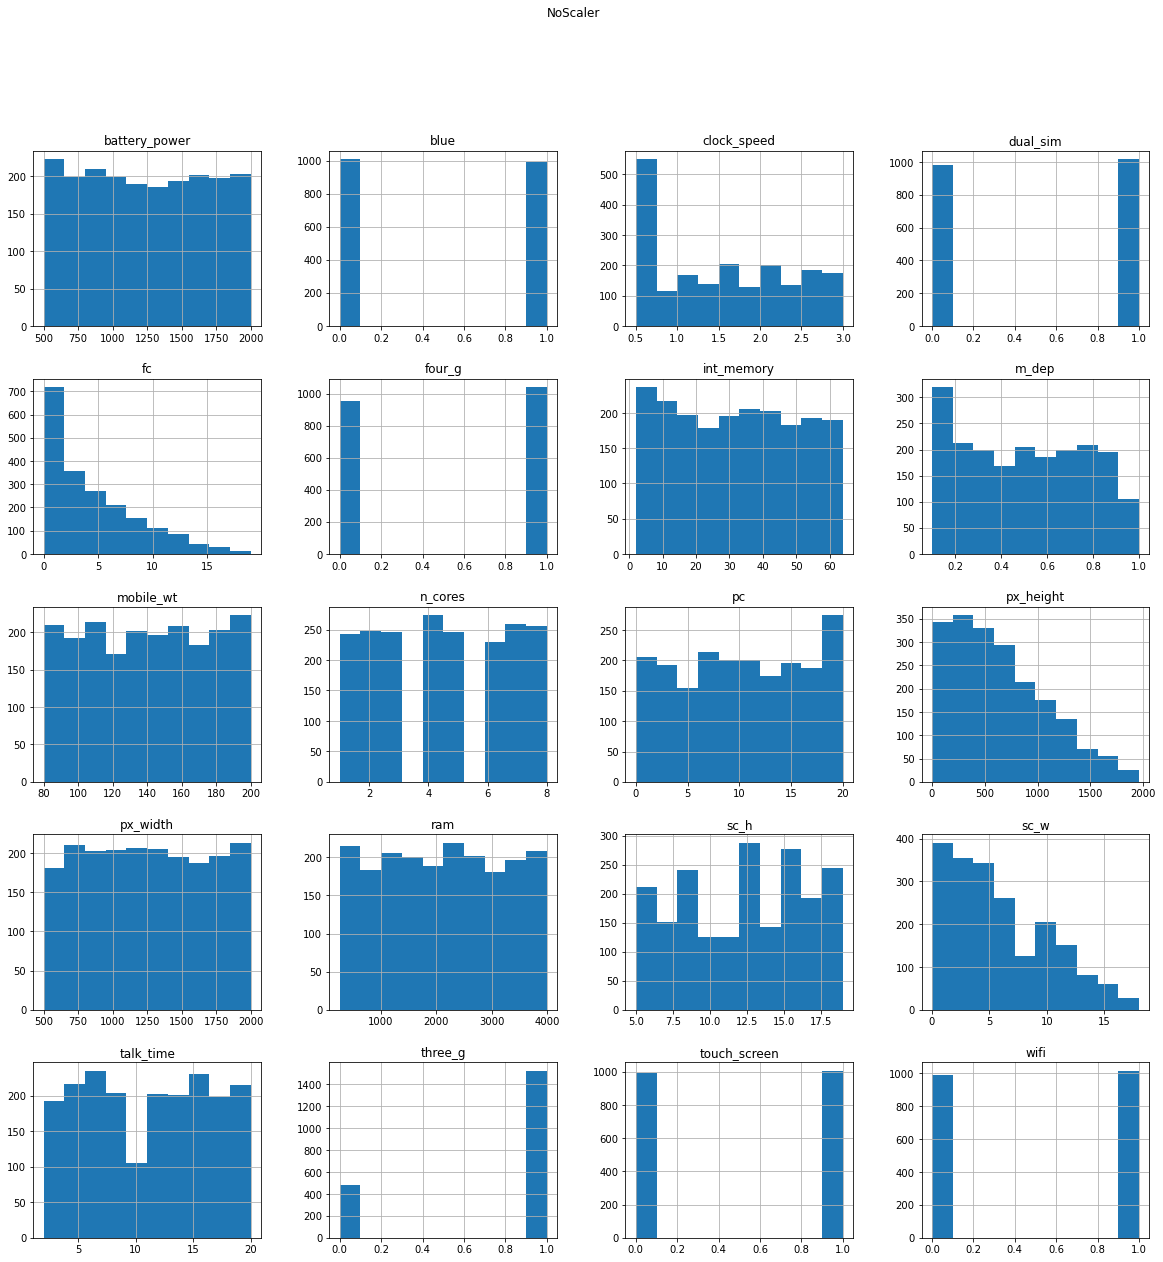

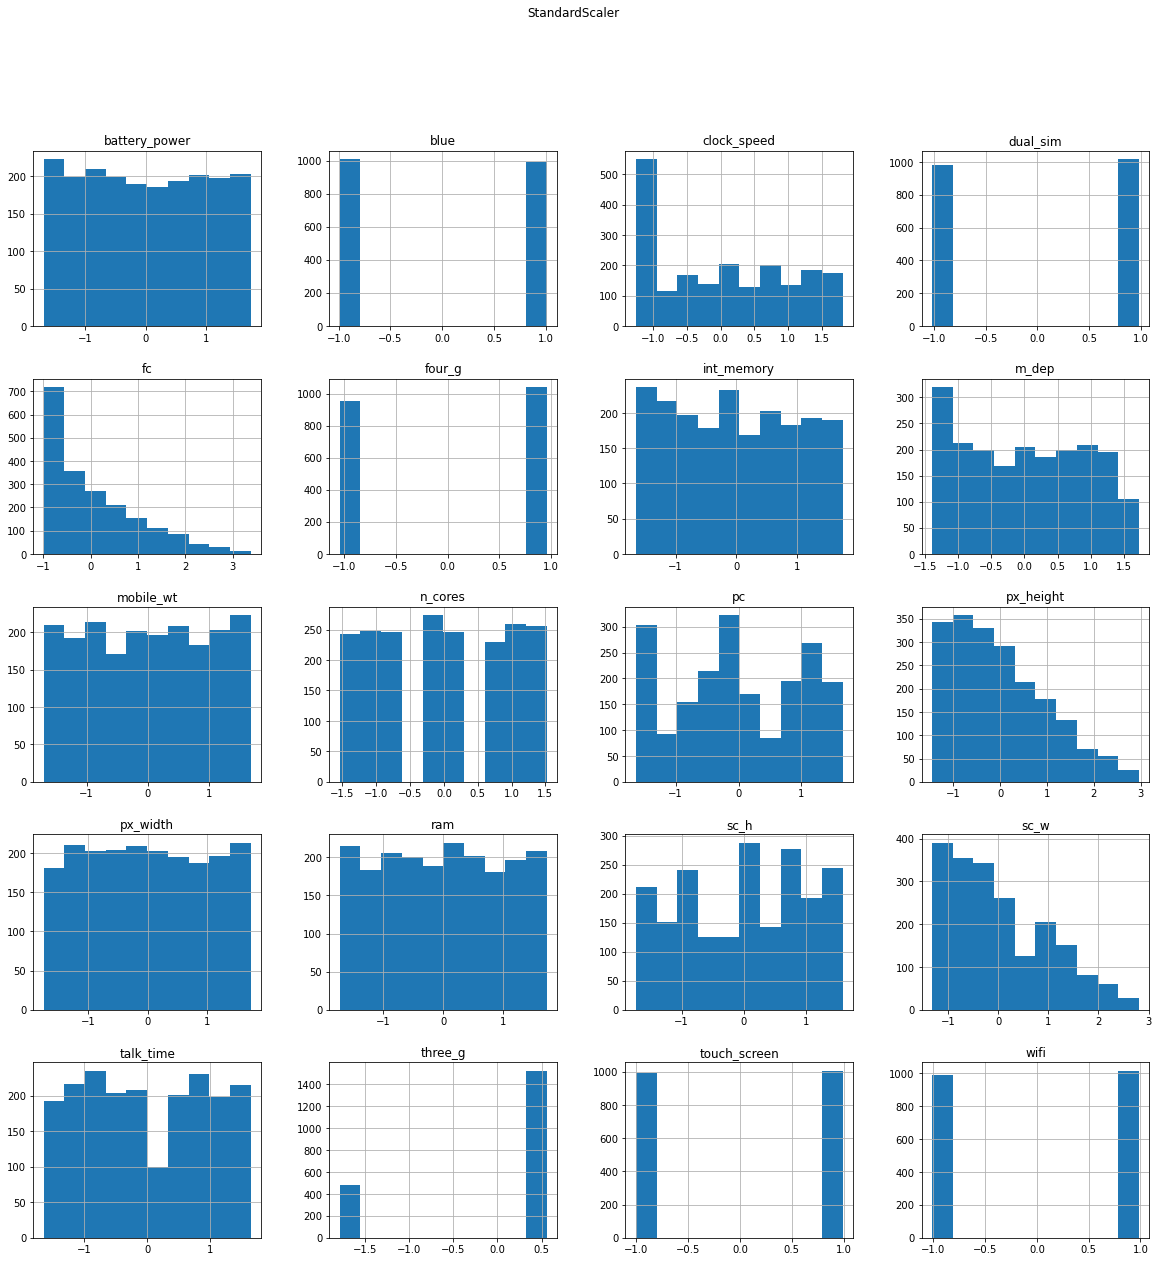

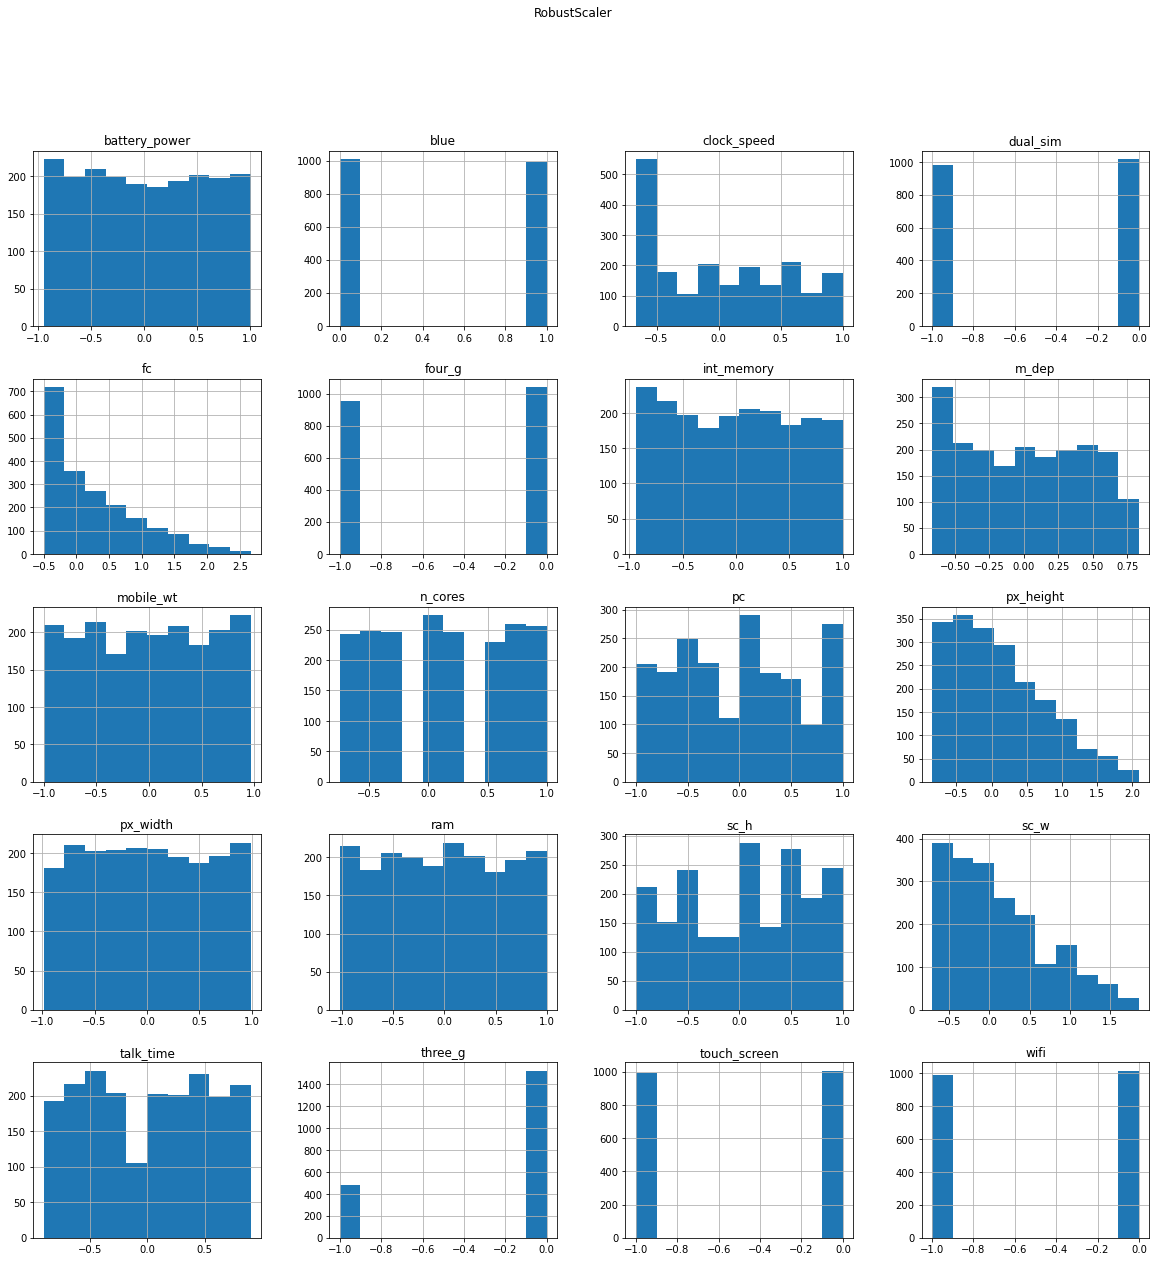

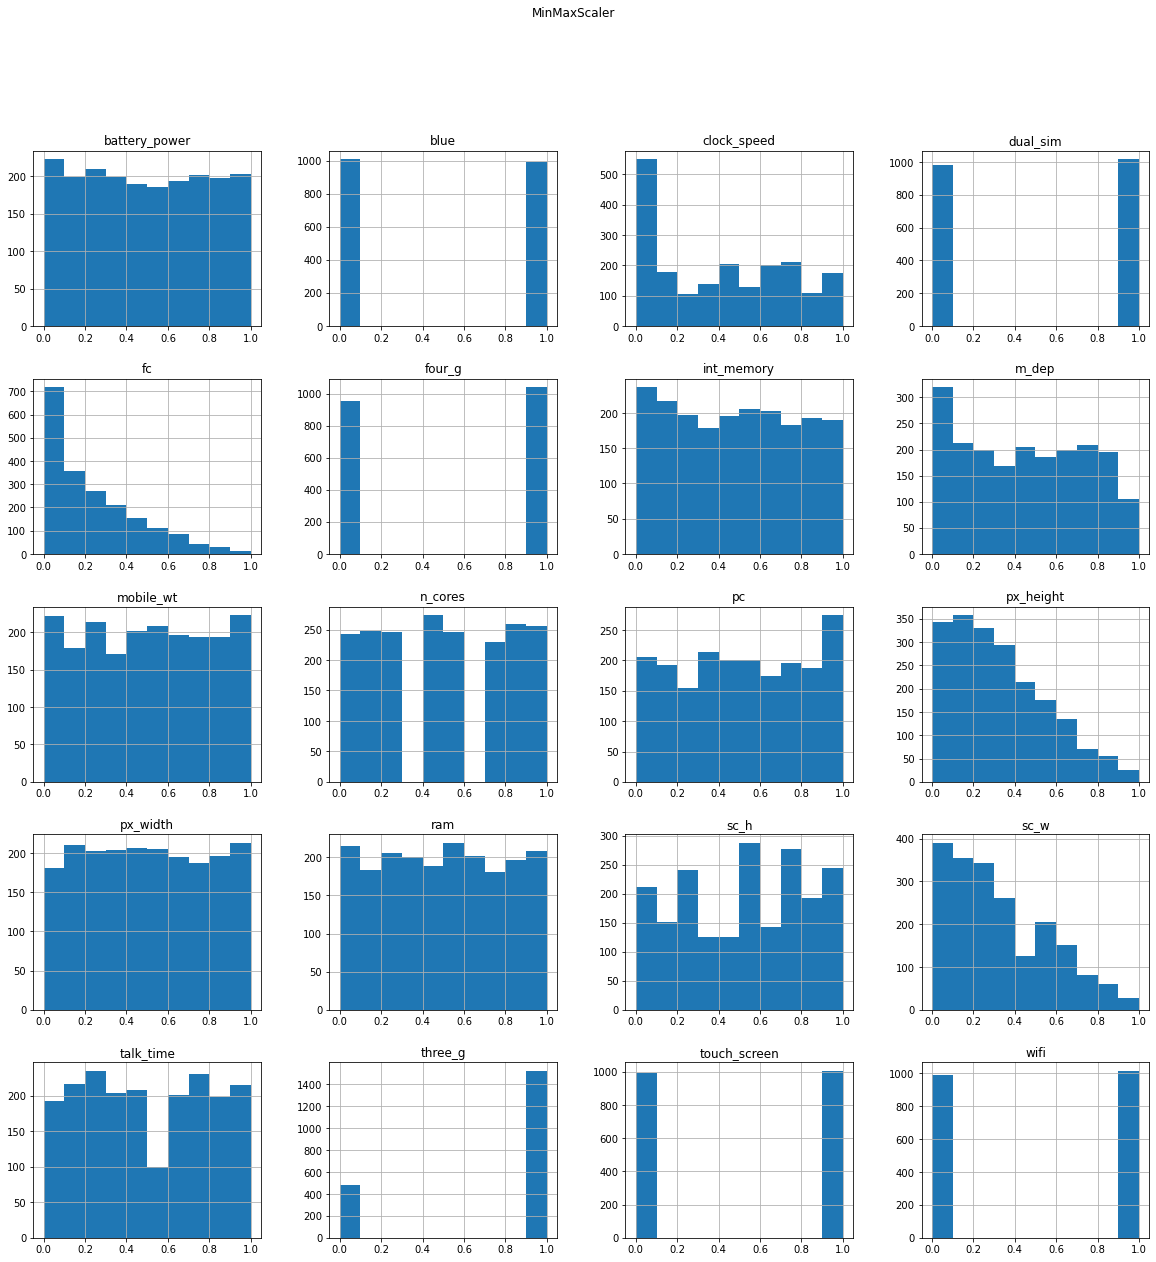

In [53]:
columns = dados.columns.drop('price_range')
for Xi in Xs:
    df = pd.DataFrame(data=Xi[1], columns=columns)
    fig = plt.figure(figsize = (20,20))    
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    ax = fig.gca()        
    df.hist(ax = ax)
    pl.suptitle(Xi[0])

A seguir teremos duas análises, a primeira sem utilização do pipeline, realizando o treinamento e a a predição para cada um dos modelos e cross validators, porém com os dados já ajustados pelos scalers conforme histogramas acima. A segunda análise será por meio da utilização de pipelines, passando os dados originais e atribuindo scalers a eles.

In [58]:
final.clear()
for cv in cvs:
    for modelo in modelos:
        for Xi in Xs:
            mean = 0
            for i in range(10):
                scores = cross_validate(modelo, Xi[1], y, cv=cv)
                mean += np.mean(scores['test_score'])
            mean = mean/10
            final.append((type(modelo).__name__, type(cv).__name__, Xi[0], mean, False))

for cv in cvs:
    for modelo in modelos:
        for sc in scs:
            mean = 0
            for i in range(10):
                pipeline =  Pipeline([("padronizacao", sc), ("classificador", modelo)])
                scores = cross_validate(pipeline, X, y, cv=cv)
                mean += np.mean(scores['test_score'])
            mean = mean /10
            final.append((type(modelo).__name__, type(cv).__name__, type(sc).__name__, mean, True))

In [59]:
df = pd.DataFrame(data=final, columns=final_cols)

Abaixo os resultados da primeira análise, sem o pipeline.

In [60]:
df1 = df[df['pipeline'] == False]
df1 = df1.sort_values(by='mean', ascending=False)
df1 = df1.drop('pipeline', axis=1)
df1.head(10)

,modelo,cross_validator,scaler,mean
9,LogisticRegression,ShuffleSplit,StandardScaler,0.96680
25,LogisticRegression,StratifiedShuffleSplit,StandardScaler,0.96410
1,LogisticRegression,KFold,StandardScaler,0.96250
17,LogisticRegression,StratifiedKFold,StandardScaler,0.96250
10,LogisticRegression,ShuffleSplit,RobustScaler,0.95810
18,LogisticRegression,StratifiedKFold,RobustScaler,0.95450
26,LogisticRegression,StratifiedShuffleSplit,RobustScaler,0.95420
2,LogisticRegression,KFold,RobustScaler,0.95400
33,LogisticRegression,TimeSeriesSplit,StandardScaler,0.93994
12,KNeighborsClassifier,ShuffleSplit,NoScaler,0.92970


Abaixo, o resultado da segunda análise, com os pipelines.

In [61]:
df2 = df[df['pipeline']]
df2 = df2.sort_values(by='mean', ascending=False)
df2 = df2.drop('pipeline', axis=1)
df2.head(10)

,modelo,cross_validator,scaler,mean
58,LogisticRegression,StratifiedShuffleSplit,StandardScaler,0.96710
46,LogisticRegression,ShuffleSplit,StandardScaler,0.96260
40,LogisticRegression,KFold,StandardScaler,0.96250
52,LogisticRegression,StratifiedKFold,StandardScaler,0.96250
47,LogisticRegression,ShuffleSplit,RobustScaler,0.95850
59,LogisticRegression,StratifiedShuffleSplit,RobustScaler,0.95590
41,LogisticRegression,KFold,RobustScaler,0.95450
53,LogisticRegression,StratifiedKFold,RobustScaler,0.95450
64,LogisticRegression,TimeSeriesSplit,StandardScaler,0.93994
60,LogisticRegression,StratifiedShuffleSplit,MinMaxScaler,0.92980


Concluindo, para a base utilizada, a regressão logística trouxe quase sempre uma predição melhor que o KNN (19 em 20). O melhor scaler foi o Standard Scaler e houve uma pequena diferença quando se usa pipeline de quando não se utiliza.